In [1]:
!pip install pytesseract #pytesseract is useful in reading, editing and obtaining text from images

In [2]:
!sudo apt install tesseract-ocr #optical chracter recognition

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,858 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
from google.colab import files

In [4]:
from google.colab.patches import cv2_imshow

In [5]:
import cv2
import pytesseract
import io
from PIL import Image #python imaging library

In [6]:
image = cv2.imread('/content/img.jpeg') #Read the image file

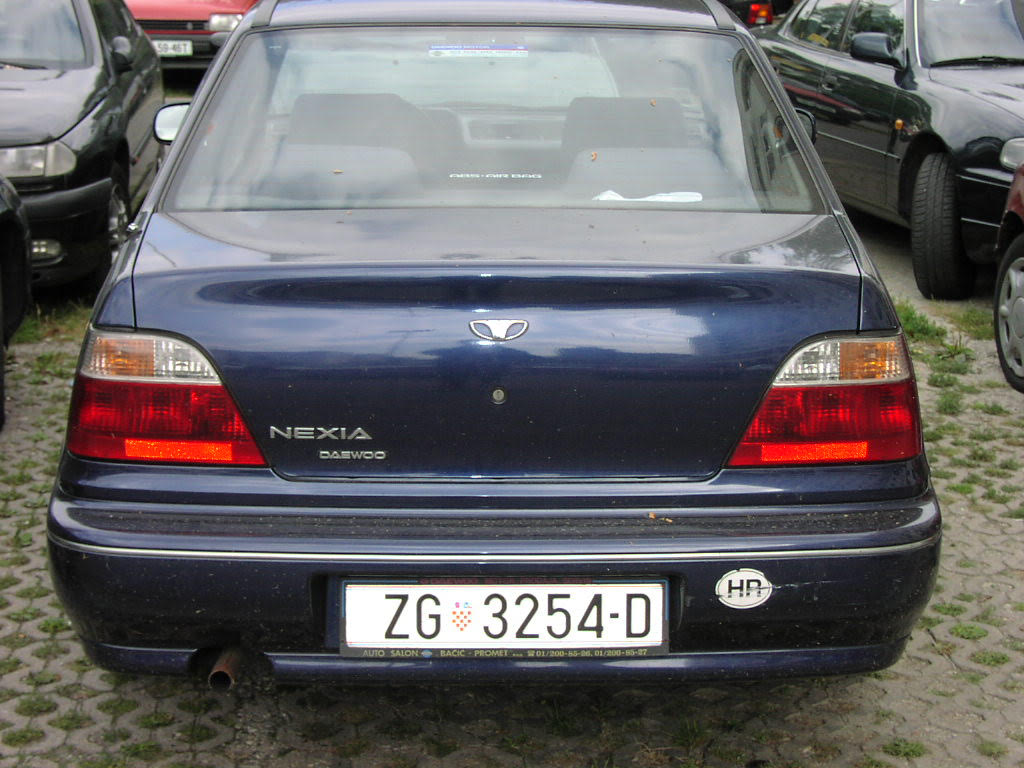

In [7]:
cv2_imshow(image)

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Convert to GrayScale image

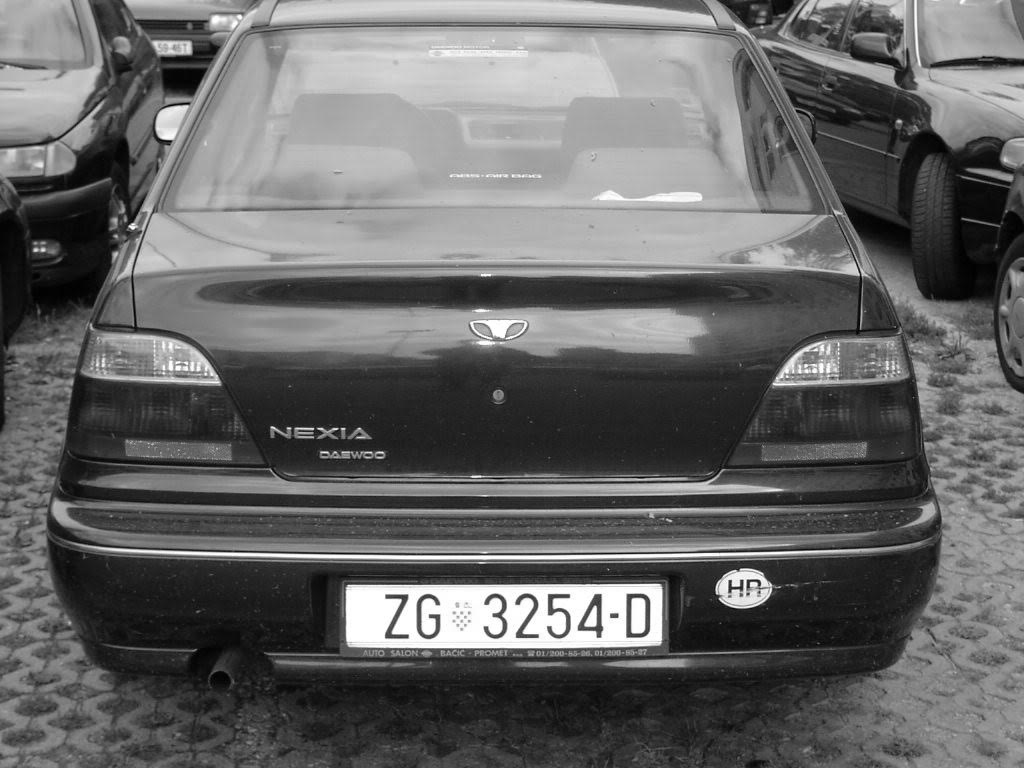

In [9]:
cv2_imshow(gray_image)

In [10]:
canny_edge = cv2.Canny(gray_image, 170, 200) #Canny Edge Detection

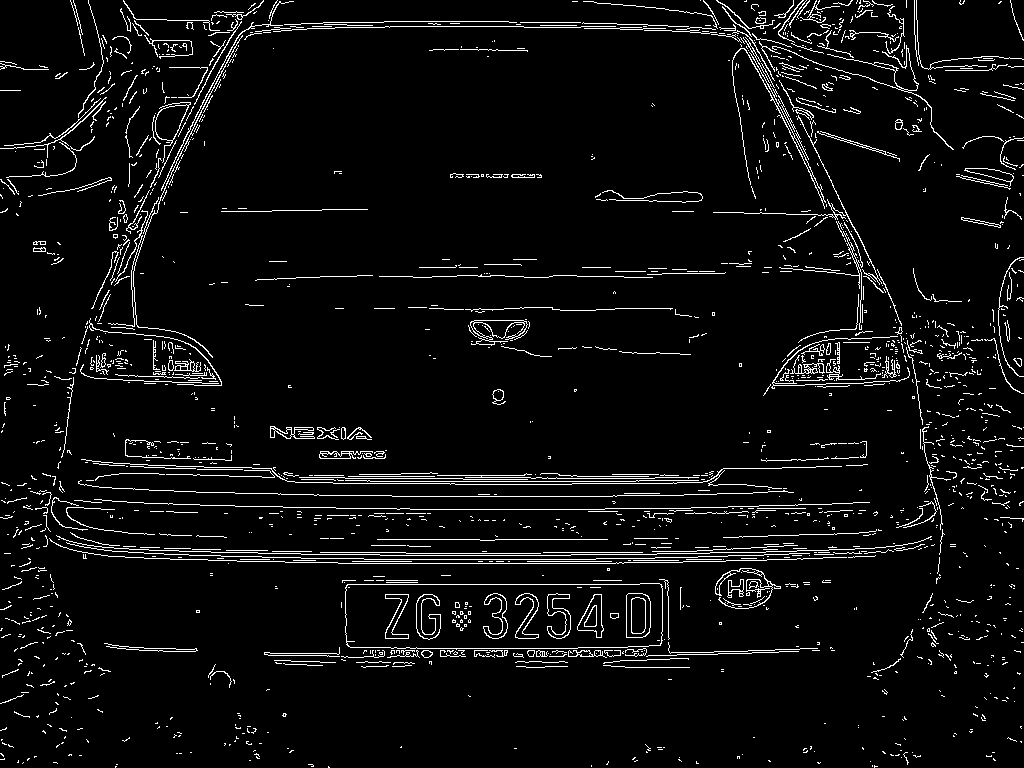

In [11]:
cv2_imshow(canny_edge)

In [12]:
# Find contours based on Edges
contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]

In [13]:
print(contours)

[array([[[640, 583]],

       [[639, 584]],

       [[347, 584]],

       [[346, 585]],

       [[346, 586]],

       [[345, 587]],

       [[345, 588]],

       [[346, 589]],

       [[346, 590]],

       [[345, 591]],

       [[345, 613]],

       [[346, 614]],

       [[345, 615]],

       [[345, 617]],

       [[346, 618]],

       [[346, 625]],

       [[345, 626]],

       [[345, 632]],

       [[346, 633]],

       [[345, 634]],

       [[346, 635]],

       [[346, 642]],

       [[347, 643]],

       [[346, 644]],

       [[348, 646]],

       [[349, 646]],

       [[350, 647]],

       [[390, 647]],

       [[391, 648]],

       [[393, 648]],

       [[394, 647]],

       [[396, 647]],

       [[397, 648]],

       [[405, 648]],

       [[406, 647]],

       [[409, 647]],

       [[410, 648]],

       [[415, 648]],

       [[416, 647]],

       [[417, 648]],

       [[455, 648]],

       [[456, 649]],

       [[457, 648]],

       [[577, 648]],

       [[578, 647]],

       [[

In [14]:
# Initialize license Plate contour and x,y coordinates
contour_with_license_plate = None
license_plate = None
x = None
y = None
w = None
h = None

In [15]:
# Find the contour with 4 potential corners and creat ROI around it
for contour in contours:
        # Find Perimeter of contour and it should be a closed contour
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
        if len(approx) == 4: #see whether it is a Rect
            contour_with_license_plate = approx
            x, y, w, h = cv2.boundingRect(contour)
            license_plate=gray_image[y:y+h,x:x+w]
            break


In [16]:
print(x)
print(y)
print(w)
print(h)

345
583
318
67


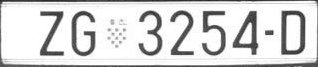

In [17]:
cv2_imshow(license_plate)

In [18]:
# Removing Noise from the detected image, before sending to Tesseract
license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)

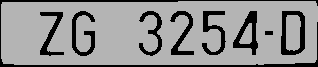

In [19]:
cv2_imshow(license_plate)
# license__plate = cv2.imread('/content/download (1).png')

In [20]:
#Text Recognition
text = pytesseract.image_to_string(license_plate)

In [21]:
print("License Plate :", text)

License Plate : ZG 3254-D



In [22]:
#Draw License Plate and write the Text
image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 3)

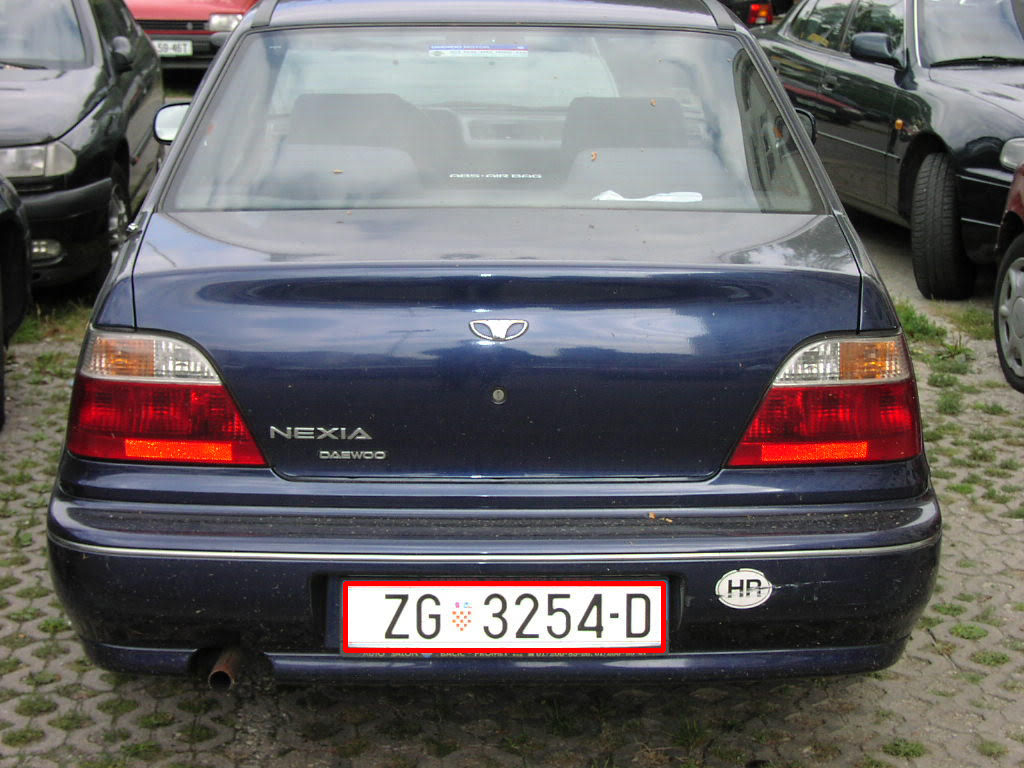

In [23]:
cv2_imshow(image)

In [24]:
# Write the text on the image
image = cv2.putText(image, text, (x-100,y-50), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,255,0), 6, cv2.LINE_AA)

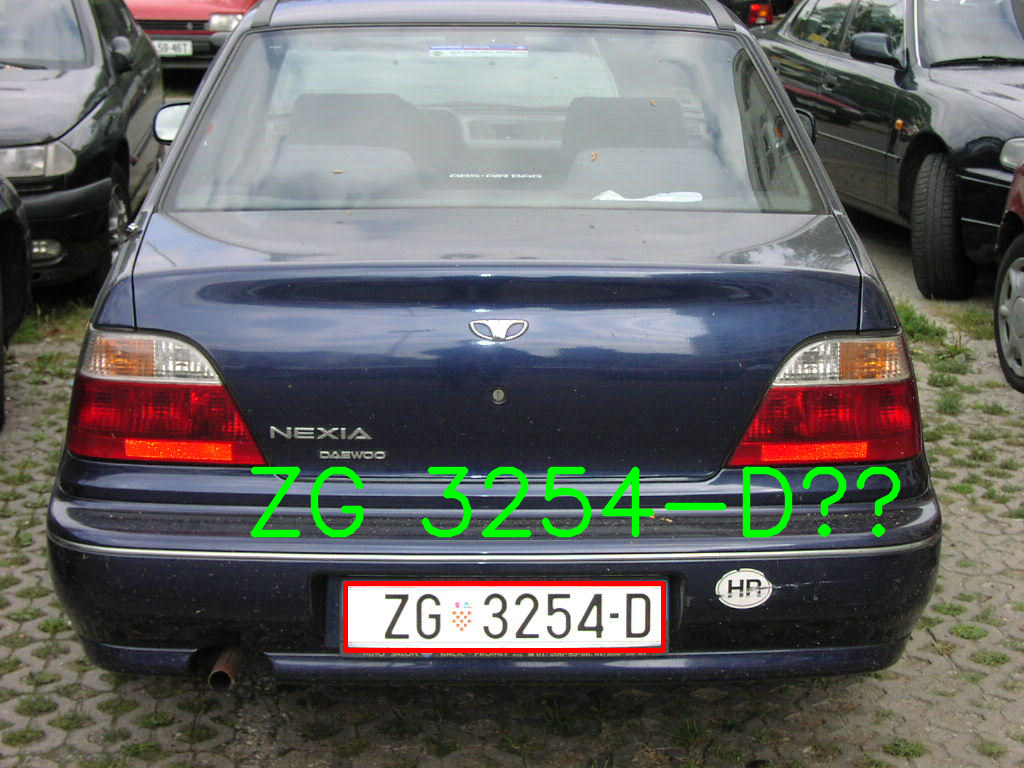

In [25]:
cv2_imshow(image)